# THE STEWIE REGULATE VLOG STATS
- stats by papagm - www.github.io/gmulhearn
- content by Stewie - https://www.youtube.com/channel/UCN-VbJLcckkpU_L1nIPsZdg

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS 
import seaborn as sns


In [18]:
df = pd.read_csv('regulatestats.csv')

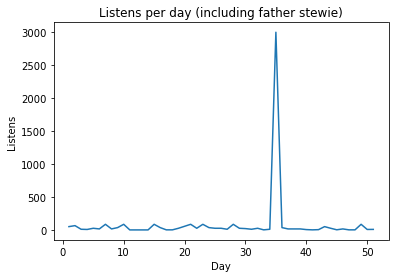

Text(0.5, 1.0, 'Cumulative listens per day (including father stewie)')

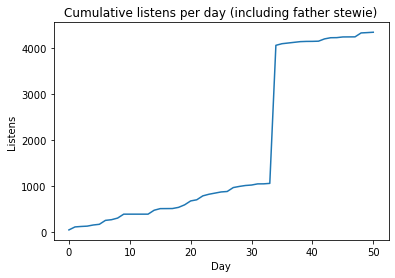

In [19]:
# regulate the data
df.Listens = df.Listens.fillna(np.mean(df.Listens))

plt.plot(df.Day, df.Listens)
plt.xlabel('Day')
plt.ylabel('Listens')
plt.title('Listens per day (including father stewie)')
plt.show()

plt.plot(np.cumsum(df.Listens))
plt.xlabel('Day')
plt.ylabel('Listens')
plt.title('Cumulative listens per day (including father stewie)')

In [20]:
# remove father stewie
df = df.drop([34])

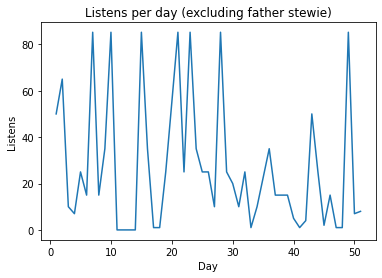

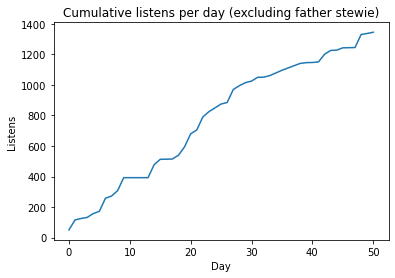



TOTAL LISTENS AS OF 25/6/20: 1345


In [21]:
plt.plot(df.Day, df.Listens)
plt.xlabel('Day')
plt.ylabel('Listens')
plt.title('Listens per day (excluding father stewie)')
plt.show()

plt.plot(np.cumsum(df.Listens))
plt.xlabel('Day')
plt.ylabel('Listens')
plt.title('Cumulative listens per day (excluding father stewie)')
plt.show()

print(f"\n\nTOTAL LISTENS AS OF 25/6/20: {int(np.sum(df.Listens))}")

Text(0.5, 1.0, 'Count of stewie moods')

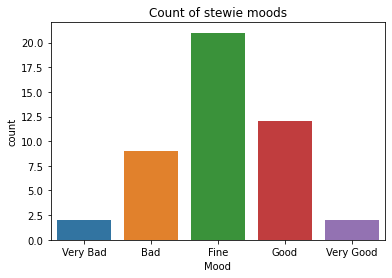

In [22]:
sns.countplot(df.Mood, order=['Very Bad', 'Bad', 'Fine', 'Good', 'Very Good']).set_title('Count of stewie moods')

Text(0.5, 1.0, 'Shoes on head per day')

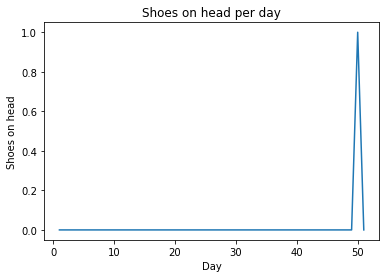

In [23]:
shoe_on_head = [0]*51
shoe_on_head[49] = 1
plt.plot(np.linspace(1,51, 51), shoe_on_head)
plt.xlabel('Day')
plt.ylabel('Shoes on head')
plt.title('Shoes on head per day')

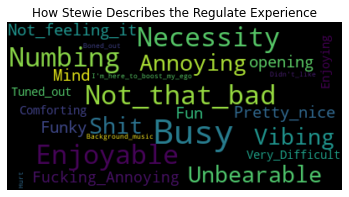

Text(0.5, 1.0, 'Most Common Experience Descriptions')

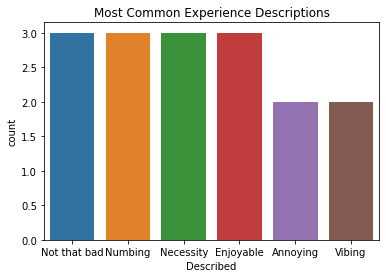

In [24]:
descriptions = ""
for description in df.Described.dropna():
    descriptions +=description.replace(" ", "_") + ' '
    
wordcloud = WordCloud(max_font_size=40).generate(descriptions)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("How Stewie Describes the Regulate Experience")
plt.axis("off")
plt.show()

sns.countplot(df.Described, order=pd.value_counts(df['Described']).iloc[1:7].index).set_title("Most Common Experience Descriptions")

In [25]:
# plot stewie mood over time
cleanup_moods = {"Mood": {"Very Bad": 1, "Bad": 2, "Fine": 3, "Good": 4, "Very Good":5}}
df.replace(cleanup_moods, inplace=True)

Text(0.5, 1.0, "Stewie's Mood Over Time")

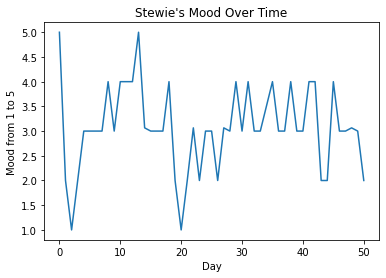

In [26]:
plt.plot(df.Mood.fillna(np.mean(df.Mood)))
plt.xlabel("Day")
plt.ylabel("Mood from 1 to 5")
plt.title("Stewie's Mood Over Time")